<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [133]:
class Layer:
    
    def __init__(self, s):
        self.depth, self.range = [int(_) for _ in s.split(': ', 1)]
        self.forward = True
        self.scanner = 0
        
    def __repr__(self):
        return 'Layer(depth={}, range={}, scanner={})'.format(
            self.depth,
            self.range,
            self.scanner,
            )
    
    def tick(self):
        if self.forward:
            new_value = self.scanner + 1
            if new_value >= self.range:
                self.forward = not self.forward
                new_value = self.scanner - 1
        else:
            new_value = self.scanner - 1
            if new_value < 0:
                self.forward = not self.forward
                new_value = self.scanner + 1 
        self.scanner = new_value
    
# test
l0 = Layer('0: 3')
assert l0.depth == 0
assert l0.range == 3
assert l0.forward == True
l1 = Layer('1: 2')
assert l1.depth == 1
assert l1.range == 2
# test tick 

l0 = Layer('0: 3')
assert l0.forward == True
assert l0.scanner == 0
l0.tick()
assert l0.forward == True
assert l0.scanner == 1
l0.tick()
assert l0.forward == True
assert l0.scanner == 2
l0.tick()
assert l0.forward == False
assert l0.scanner == 1
l0.tick()
assert l0.forward == False
assert l0.scanner == 0
l0.tick()
assert l0.forward == True
assert l0.scanner == 1

In [134]:
from collections import defaultdict

class Firewall:
    
    def __init__(self):
        self.kernel = defaultdict(bool)
        self.max_depth = 0
        self.max_range = 0
        self._clock = 0
        
    def add(self, layer):
        self.kernel[layer.depth] = layer
        self.max_depth = max(self.max_depth, layer.depth)
        self.max_range = max(self.max_range, layer.range)
        
    def __iter__(self):
        return (self.kernel[k] for k in self.kernel if self.kernel[k])
        
    def tick(self):
        self._clock += 1
        for layer in self:
            layer.tick()                
        
    def __str__(self):
        buff = []
        buff.append('Picosecond {}:\n'.format(self._clock))
        for d in range(self.max_depth+1):
            buff.append('{:^5}'.format(d))
        buff.append('\n')
        for r in range(self.max_range+1):
            for d in range(self.max_depth+1):
                layer = self.kernel[d]
                if layer:
                    if layer.range > r:
                        if layer.scanner == r:
                            buff.append(' [S] ')
                        else:
                            buff.append(' [ ] ')
                    else:
                        buff.append('     ')
                elif r == 0:
                    buff.append(' ... ')
                else:
                    buff.append('     ')
            buff.append('\n')
        return ''.join(buff)
        

In [321]:
def load_firewall(filename, max_lines=0):
    firewall = Firewall()
    nl = 0
    with open(filename, 'r') as f:
        for nl, l in enumerate(f):
            firewall.add(Layer(l.strip()))        
            if nl == max_lines - 1:
                break
    return firewall

firewall = load_firewall('input_test.txt')
        
#assert firewall.max_depth == 6
#assert firewall.max_range == 4
print(firewall)
firewall.tick()
print(firewall)
firewall.tick()
print(firewall)
firewall.tick()
print(firewall)
firewall.tick()
print(firewall)

Picosecond 0:
  0    1    2    3    4    5    6  
 [S]  [S]  ...  ...  [S]  ...  [S] 
 [ ]  [ ]            [ ]       [ ] 
 [ ]                 [ ]       [ ] 
                     [ ]       [ ] 
                                   

Picosecond 1:
  0    1    2    3    4    5    6  
 [ ]  [ ]  ...  ...  [ ]  ...  [ ] 
 [S]  [S]            [S]       [S] 
 [ ]                 [ ]       [ ] 
                     [ ]       [ ] 
                                   

Picosecond 2:
  0    1    2    3    4    5    6  
 [ ]  [S]  ...  ...  [ ]  ...  [ ] 
 [ ]  [ ]            [ ]       [ ] 
 [S]                 [S]       [S] 
                     [ ]       [ ] 
                                   

Picosecond 3:
  0    1    2    3    4    5    6  
 [ ]  [ ]  ...  ...  [ ]  ...  [ ] 
 [S]  [S]            [ ]       [ ] 
 [ ]                 [ ]       [ ] 
                     [S]       [S] 
                                   

Picosecond 4:
  0    1    2    3    4    5    6  
 [S]  [S]  ...  ...  [ ]  

In [316]:
for layer in firewall: print(layer)

Layer(depth=0, range=3, scanner=0)
Layer(depth=1, range=2, scanner=0)
Layer(depth=4, range=4, scanner=2)
Layer(depth=6, range=4, scanner=2)


In [215]:
def go(firewall):
    hits = 0
    severity = 0
    for player in range(0, firewall.max_depth+1):    
        layer = firewall.kernel[player]
        # print('Player:', player, 'layer', layer, end=' ')
        if layer and layer.scanner == 0:
            # print('[hit]')
            hits += 1
            severity += layer.depth * layer.range
        # else:
            # print('[Ok]')
        firewall.tick()
    return(hits, severity)
    
firewall = load_firewall('input.txt')
hits, severity = go(firewall)
print('hits:', hits)
print('severity:', severity)

hits: 6
severity: 1476


In [152]:
## Part 2

In [271]:
firewall = load_firewall('input_test.txt')

delay = 10
for i in range(delay):
    firewall.tick()

hits, severity = go(firewall)
print('hits:', hits)
print('severity:', severity)

hits: 0
severity: 0


In [344]:
delays = list(range(450, 3000))

seq_hits = []
seq_severity = []
for delay in delays:
    firewall = load_firewall('input.txt', max_lines=22)
    #print('firewall depth: {}'.format(firewall.max_depth))
    for i in range(delay):
        firewall.tick()
    hits, severity = go(firewall)
    if severity == 0:
        print('Found delay: {}'.format(delay))
    seq_hits.append(hits)
    seq_severity.append(severity)
    # print('Severity at delay {} is {}'.format(delay, severity))
print(firewall)

Found delay: 464
Found delay: 1724
Picosecond 3040:
  0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40  
 [S]  [S]  [ ]  ...  [S]  ...  [S]  ...  [S]  ...  [S]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [S]  ...  [ ]  ...  [S]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ] 
 [ ]  [ ]  [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ] 
 [ ]       [S]       [ ]       [ ]       [ ]       [ ]       [S]       [S]       [S]       [ ]       [S]       [ ]       [S]       [ ]       [S]       [ ]       [S]       [S]       [S]       [S]       [ ] 
           [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]       [ ]

In [369]:
import sys 

def tryit(firewall):
    for player in range(0, firewall.max_depth+1):    
        layer = firewall.kernel[player]
        if layer and layer.scanner == 0:
            severity = layer.depth * layer.range
            if severity > 0:
                return False
        firewall.tick()
    return True

firewall = load_firewall('input_test.txt')
for i in range(10):
    firewall.tick()
assert tryit(firewall) == True

In [373]:
for t in range(0,5):
    firewall = load_firewall('input.txt', max_lines=35)
    delay = 562424 + t * 277200
    for i in range(delay):
        firewall.tick()
    found = tryit(firewall)
    if found:
        print('Found delay: {}'.format(delay), 't', t)
    # print('Severity at delay {} is {}'.format(delay, severity))

Found delay: 562424 t 0
Found delay: 839624 t 1
Found delay: 1116824 t 2
Found delay: 1394024 t 3
Found delay: 1671224 t 4


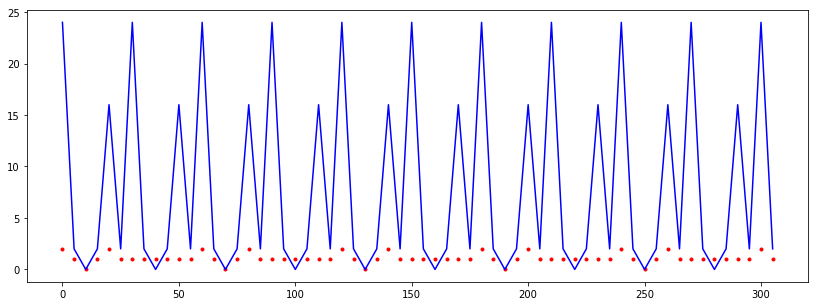

In [288]:
%matplotlib inline
import matplotlib.pyplot as plt

x = list(delays)
x, seq_hits
plt.figure(figsize=(14, 5))
plt.plot(x[::5], seq_hits[::5], 'r.')
plt.plot(x[::5], seq_severity[::5], 'b-' )

In [338]:
delays = list(range(0, 100))
for t in delays:
    delay = 104+t*180
    if delay % 100 == 0:
        sys.stdout.write('#')
        sys.stdout.flush()
    firewall = load_firewall('input.txt')
    for i in range(delay):
        firewall.tick()
    if tryit(firewall):
        print('Found delay: {}'.format(delay))
        break
else:
    print('Not found')
    print('tried until delay {}'.format(delay))

Not found
tried until delay 17924


In [233]:
firewall.max_depth*100

9800

In [236]:
print(firewall)

Picosecond 12000:
  0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96   97   98  
 [S]  [S]  [S]  ...  [S]  ...  [S]  ...  [S]  ...  [S]  ...  [S]  ...  [ ]  ...  [ ]  ...  [S]  ...  [ ]  ...  [S]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  ...  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  ...  ...  ...  ...  ...  ...  [ ]  ...  [ ]  ...  [ ]  ...  [ ]  ...  ...  ...  [S]  ...  ...  ...  ...  ...  [ ]  

In [246]:
firewall = load_firewall('input.txt')

In [384]:
for i in range(1,1000, 2):
    firewall = load_firewall('input_test.txt')
    print(i, i&1)
    for delay in range(i):
        firewall.tick()
    assert go(firewall) == False
print('Ummkm oki')

1 1


AssertionError: 

In [494]:
for delay in range(0, 92):
    f = Firewall()
    f.add(Layer('22: 6'))
    for _ in range(delay):
        f.tick()
    success = tryit(f)
    if not success:
        print(delay, 'x')


8 x
18 x
28 x
38 x
48 x
58 x
68 x
78 x
88 x


In [495]:
t = 0
def chk(t):
    return all([
        t % 2 != 0,
        t % 6 != 4, 
        t % 10 != 6,
        t % 8 != 2,
        t % 10 != 2,
        t % 10 != 0,
        t % 6 != 0,
        t % 14 != 0,
        t % 14 != 12,
        t % 16 != 14,
        t % 14 != 8,
        t % 10 != 8,
    ])

sols = [i for i in range(123) if chk(i)]
print(', '.join([str(i) for i in sols]), 'total:', len(sols))

1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121 total: 61
